<link rel="stylesheet" href="ipython.min.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Visualização de Dados com Plotly
---

## Conteúdo

- Preparação de Dados: Vacinação em Santa Catarina
- Biblioteca Plotly
- Gráficos Básicos
- Gráficos Personalizados

## Preparação de Dados: Vacinação em Santa Catarina

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("dados.csv", sep=";")
# Removendo espaços antes e depois dos valores no dataset
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
# Transformando a string de data em datetime
df.vacina_dataAplicacao = pd.to_datetime(df.vacina_dataAplicacao)

In [3]:
df.head()

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,4058366d-c280-486c-8e34-441e83d79cf5-i0b0,a4f7478d225eeda867f6bc1f6a10508800a711be9a9a52...,68,1953-03-25,F,1,BRANCA,421730.0,10.0,SAUDADES,...,210099,FUNDACAO BUTANTAN,Organization/61189445000156,2021-04-01 03:00:00+00:00,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-01 12:58:53,16341
1,38bc61c9-e733-44c4-bce5-26b149af7f84-i0b0,460da354e2dacdb95463279ddb1b8f90c985c08796badf...,89,1931-07-18,M,1,BRANCA,420540.0,10.0,FLORIANOPOLIS,...,210039,SERUM INSTITUTE OF INDIA LTD,NaN,2021-02-26 00:00:00+00:00,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,ESUS APS - NACIONAL (OFFLINE),2021-03-06 12:23:47,18602
2,cb9c4765-9901-4e14-910b-9bd79040b450-i0b0,068c38ee140c142ae43fa7a2e382943a5e52d2f96b4b68...,19,2002-01-10,F,99,SEM INFORMACAO,420930.0,10.0,LAGES,...,CTMAV505,MINISTERIO DA SAUDE,Organization/00394544000851,2021-04-07 03:00:00+00:00,1ª Dose,89,Covid-19-AstraZeneca,Novo PNI,2021-04-07 17:28:42,16341
3,439393c3-a2fc-4236-aa38-d37cc5d57c62-i0b0,887c158c2869b42fc596592900e3327b1e02036dda516a...,86,1934-05-26,F,1,BRANCA,421170.0,10.0,ORLEANS,...,4120Z027,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-02-27 03:00:00+00:00,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-02-27 20:19:34,16341
4,511c93a4-686e-4927-9371-dbb953516647-i0b0,fab3cdb6e839279b481d27b5b4f8e4051f5a5ad68c6cc9...,38,1982-12-22,F,1,BRANCA,421720.0,10.0,SAO MIGUEL DO OESTE,...,213VCD005W,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-04-15 03:00:00+00:00,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-04-16 16:25:52,16341


### Explorando o Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513304 entries, 0 to 1513303
Data columns (total 34 columns):
 #   Column                                    Non-Null Count    Dtype              
---  ------                                    --------------    -----              
 0   document_id                               1513304 non-null  object             
 1   paciente_id                               1513304 non-null  object             
 2   paciente_idade                            1513304 non-null  int64              
 3   paciente_dataNascimento                   1513304 non-null  object             
 4   paciente_enumSexoBiologico                1513304 non-null  object             
 5   paciente_racaCor_codigo                   1513304 non-null  int64              
 6   paciente_racaCor_valor                    1513304 non-null  object             
 7   paciente_endereco_coIbgeMunicipio         1509970 non-null  float64            
 8   paciente_endereco_coPais        

# Visualização de Dados com Plotly

**Gráficos Básicos**

- Gráfico de Dispersão (scatter plot)
- Gráfico de Linha (line chart)
- Gráfico de Barra (bar chart)
- Gráfico de Bolha (bubble chart)
- Gráfico de Pontos (dot plot)
- Gráfico de Gantt (Gantt chart)
- Sunburst charts for Hierarquical Data

### Gráfico de Dispersão

**Objetivo**: observar a relação entre duas variáves contínuas.

**Exemplo**: verificar a relação entre o número de vacinados com a primeira dose e o número de vacinados com a segunda dose, por cidade.

In [5]:
df_ = df.groupby(["paciente_endereco_nmMunicipio","vacina_descricao_dose"])["paciente_id"].count().reset_index()
df_ = df_.pivot(index="paciente_endereco_nmMunicipio", columns="vacina_descricao_dose", values="paciente_id")
df_ = df_.rename_axis(None, axis=1).reset_index()
# Renomeando as colunas
df_.columns = ['Município','Primeira Dose','Segunda Dose','Dose']
# Removendo a coluna Dose que só tem 2 instâncias
df_ = df_.drop('Dose',axis=1)
df_

,Município,Primeira Dose,Segunda Dose
0,ABADIANIA,1.0,NaN
1,ABAETETUBA,4.0,2.0
2,ABARE,1.0,NaN
3,ABATIA,3.0,2.0
4,ABDON BATISTA,620.0,347.0
...,...,...,...
2664,XAVANTINA,827.0,355.0
2665,XAXIM,4275.0,2308.0
2666,XINGUARA,4.0,2.0
2667,ZORTEA,799.0,393.0


In [6]:
# Biblioteca necessária para os gráficos simples de Plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.express as px

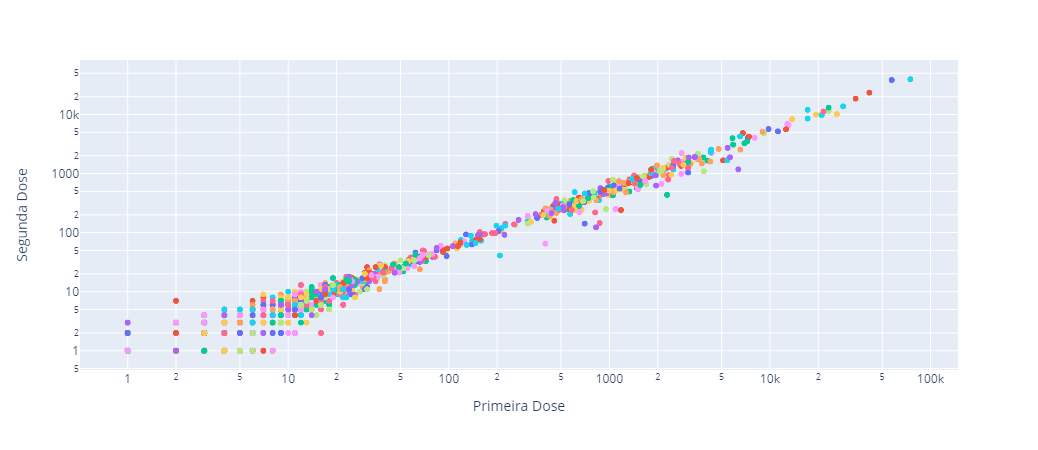

In [7]:
fig = px.scatter(df_, x="Primeira Dose", y="Segunda Dose", color="Município", log_x=True, log_y=True)
fig.update_layout(showlegend=False)
fig.show()

## Gráfico de Linha

**Objetivo**: observar o comportamento de uma variável em relação a outra, geralmente contínua.

**Exemplo**: visualizar do número de vacinas (primeira e segunda dose) aplicadas ao longo do tempo, por dia, no estado de santa catarina.

In [8]:
# Extraímos a data (YYYY-MM-DD) a partir do datetime de data de aplicação
df['vacina_dataAplicacao_dia'] = df.vacina_dataAplicacao.dt.date

In [9]:
df_ = df.groupby(["vacina_dataAplicacao_dia","vacina_descricao_dose"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
df_ = df_[df_['vacina_descricao_dose'] != 'Dose']
df_

,vacina_dataAplicacao_dia,vacina_descricao_dose,contagem
0,2020-12-21,1ª Dose,2
1,2020-12-22,1ª Dose,1
2,2021-01-10,2ª Dose,2
3,2021-01-11,1ª Dose,2
4,2021-01-12,1ª Dose,1
...,...,...,...
218,2021-05-01,2ª Dose,3800
219,2021-05-02,1ª Dose,1937
220,2021-05-02,2ª Dose,1125
221,2021-05-03,1ª Dose,3275


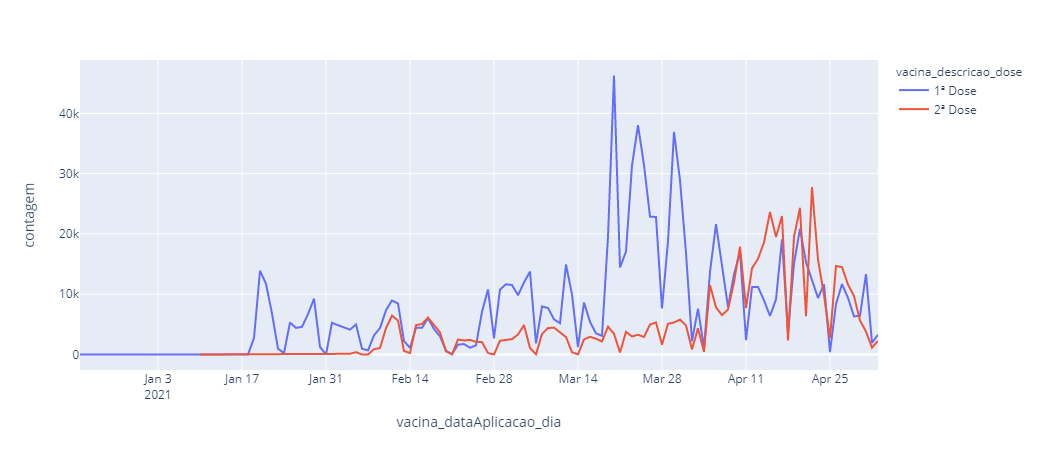

In [10]:
fig = px.line(df_, x='vacina_dataAplicacao_dia', y='contagem', color='vacina_descricao_dose')
fig.show()

## Gráfico de Barras

**Objetivo:** observar a relação entre uma variável categórica e uma numérica.

**Exemplo:** número de vacinas aplicadas por nome da vacina (Coronavac-Sinovac, AstraZeneca, etc.)

In [11]:
df_ = df.groupby(["vacina_nome"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
df_

,vacina_nome,contagem
0,Covid-19-AstraZeneca,14810
1,Covid-19-Coronavac-Sinovac/Butantan,1148727
2,Vacina Covid-19 - Covishield,349753
3,Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag,6
4,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,8


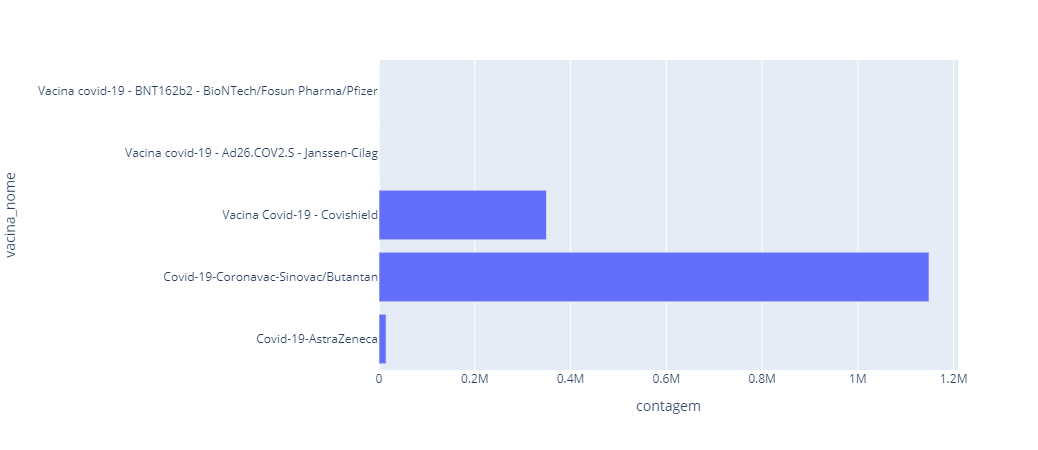

In [12]:
fig = px.bar(df_, x='contagem', y='vacina_nome')
fig.show()

## Gráfico de Pizza

**Objetivos:** observar a distribuição de uma variável categórica. Comumente usada quando tem-se poucas categórias.

**Exemplo:** percentual de vacinas aplicadas por nome de vacina.

In [13]:
df_

,vacina_nome,contagem
0,Covid-19-AstraZeneca,14810
1,Covid-19-Coronavac-Sinovac/Butantan,1148727
2,Vacina Covid-19 - Covishield,349753
3,Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag,6
4,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,8


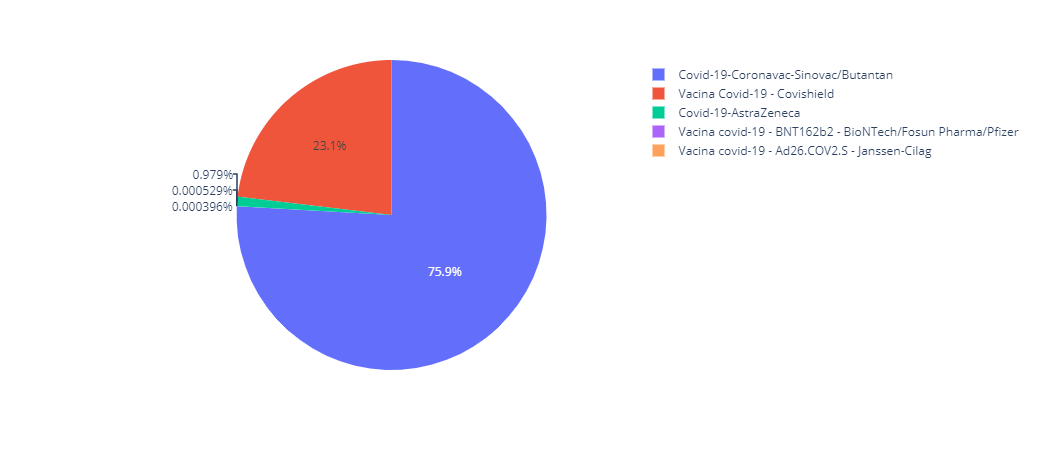

In [14]:
fig = px.pie(df_, values='contagem', names='vacina_nome')
fig.show()

## Gráfico de Pontos

**Objetivo:** observar a relação entre duas variáveis categóricas e uma numérica.

**Exemplo:** número de vacina aplicadas por sexo nas 10 cidades com maior vacinação.

In [15]:
df_ = df.groupby(["paciente_endereco_nmMunicipio"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
top10 = df_.sort_values('contagem', ascending=False).head(10).paciente_endereco_nmMunicipio.values
top10

array(['JOINVILLE', 'FLORIANOPOLIS', 'BLUMENAU', 'CHAPECO', 'LAGES',
       'ITAJAI', 'SAO JOSE', 'CRICIUMA', 'PALHOCA', 'JARAGUA DO SUL'],
      dtype=object)

In [16]:
df_ = df.groupby(["paciente_endereco_nmMunicipio","paciente_enumSexoBiologico"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
df_ = df_[df_['paciente_endereco_nmMunicipio'].isin(top10)].sort_values('contagem')
df_.head()

,paciente_endereco_nmMunicipio,paciente_enumSexoBiologico,contagem
1931,JARAGUA DO SUL,M,12036
3549,SAO JOSE,M,12809
2643,PALHOCA,M,12811
1749,ITAJAI,M,13371
1084,CRICIUMA,M,13661


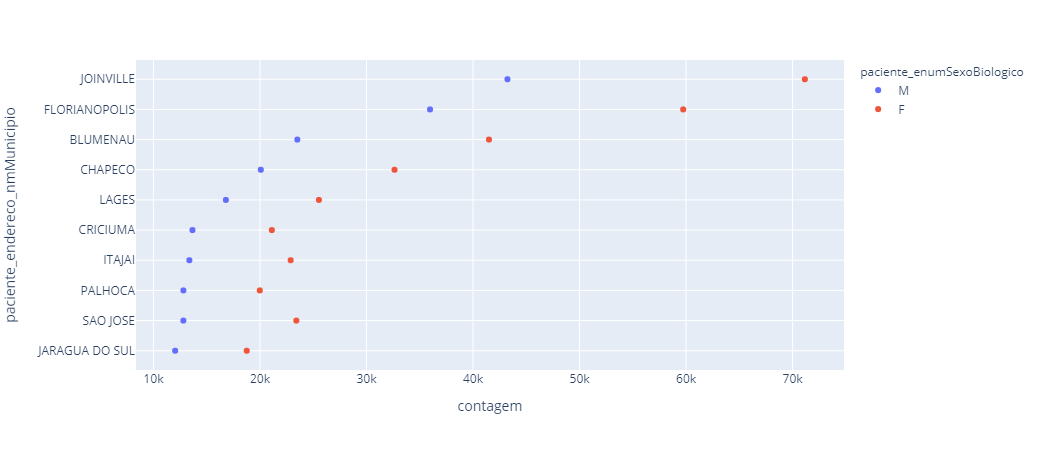

In [17]:
fig = px.scatter(df_, x="contagem", y="paciente_endereco_nmMunicipio", color="paciente_enumSexoBiologico")
fig.show()

## Sunburst charts for Hierarquical Data

**Objetivo:** observar a frequência de uma variável categórica em função dos valores de outras variáveis categóricas.

**Exemplo:** contagem/percentual de vacinados por sexo, raça e descrição da dose (primeira ou segunda dose).

**Preparação de dados**

In [18]:
df_ = df.groupby(["paciente_enumSexoBiologico","paciente_racaCor_valor","vacina_descricao_dose"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
df_ = df_[df_['vacina_descricao_dose'] != 'Dose']
df_.head()

,paciente_enumSexoBiologico,paciente_racaCor_valor,vacina_descricao_dose,contagem
0,F,AMARELA,1ª Dose,10012
1,F,AMARELA,2ª Dose,5245
2,F,BRANCA,1ª Dose,482333
3,F,BRANCA,2ª Dose,256999
5,F,INDIGENA,1ª Dose,2319


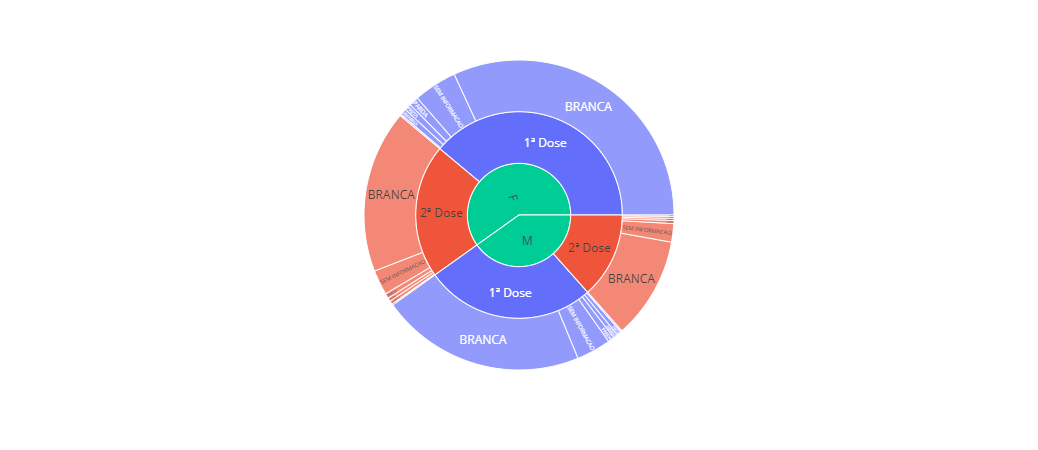

In [19]:
fig = px.sunburst(df_, path=['paciente_enumSexoBiologico','vacina_descricao_dose','paciente_racaCor_valor'], values='contagem', color='vacina_descricao_dose')
fig.show()

# Gráficos Personalizados

- O pacote `express` de plotly permite construir gráficos iniciais simples
- Em aplicações reais o consumidor final necessita de um grau de personalização maior
- Em Plotly também é possível construir gráficos com maior grau de personalização
- A partir dos exemplos no site de Plotly e em consulta com a referência é possível aprender como fazer isso:
    - Scatter Plot: https://plotly.com/python/line-and-scatter/
    - Referência: https://plotly.com/python/reference/scatter/
- Visualizar o número de vacinas aplicadas em SC por dia e sua média móvel

## Preparação de Dados

In [63]:
df_ = df.groupby(["vacina_dataAplicacao_dia"])["paciente_id"].count().reset_index()
df_ = df_.rename(columns={'paciente_id':'contagem'})
df_

,vacina_dataAplicacao_dia,contagem
0,2020-12-21,2
1,2020-12-22,1
2,2021-01-10,2
3,2021-01-11,2
4,2021-01-12,1
...,...,...
109,2021-04-29,16006
110,2021-04-30,12064
111,2021-05-01,17140
112,2021-05-02,3062


Criação de uma nova coluna com o valor da média móvel dos últimos 7 dias.

In [64]:
df_['media_movel_7d'] = df_['contagem'].rolling(window=7).mean()
df_

,vacina_dataAplicacao_dia,contagem,media_movel_7d
0,2020-12-21,2,NaN
1,2020-12-22,1,NaN
2,2021-01-10,2,NaN
3,2021-01-11,2,NaN
4,2021-01-12,1,NaN
...,...,...,...
109,2021-04-29,16006,19421.285714
110,2021-04-30,12064,17555.571429
111,2021-05-01,17140,16934.571429
112,2021-05-02,3062,16926.142857


## Gráfico

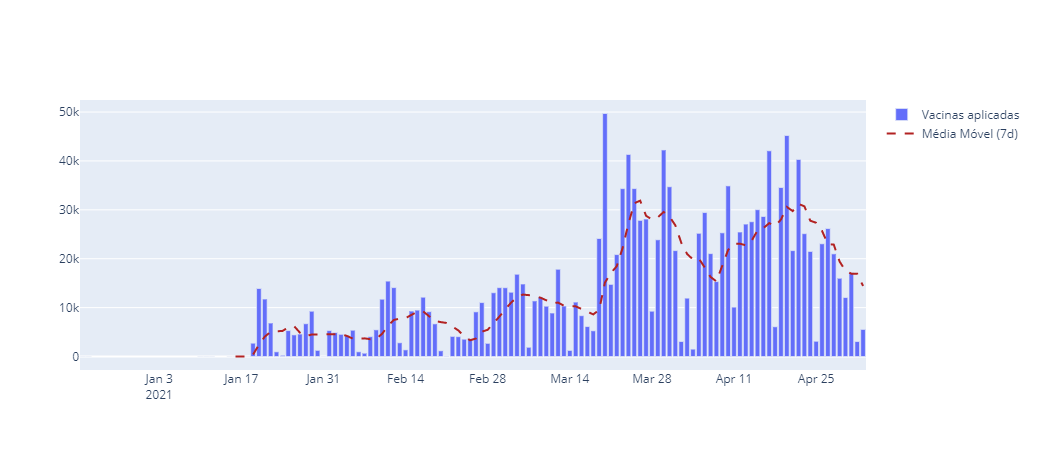

In [65]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        name='Vacinas aplicadas', 
        x=df_['vacina_dataAplicacao_dia'], 
        y=df_['contagem']
    ))
fig.add_trace(    
    go.Scatter(
        name='Média Móvel (7d)',
        x=df_['vacina_dataAplicacao_dia'], 
        y=df_['media_movel_7d'],
        line = dict(color='firebrick', width=2, dash='dash')
    ))
fig

Atualização de Layout: título principal e dos eixos x e y

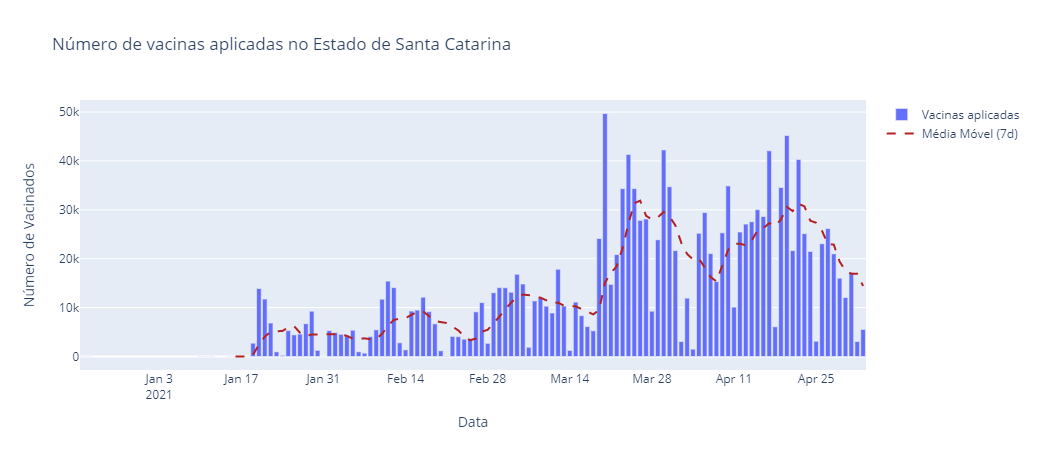

In [67]:
fig.update_layout(title='Número de vacinas aplicadas no Estado de Santa Catarina',
                   xaxis_title='Data',
                   yaxis_title='Número de Vacinados')

Atualização das informações no efeito `hover`.

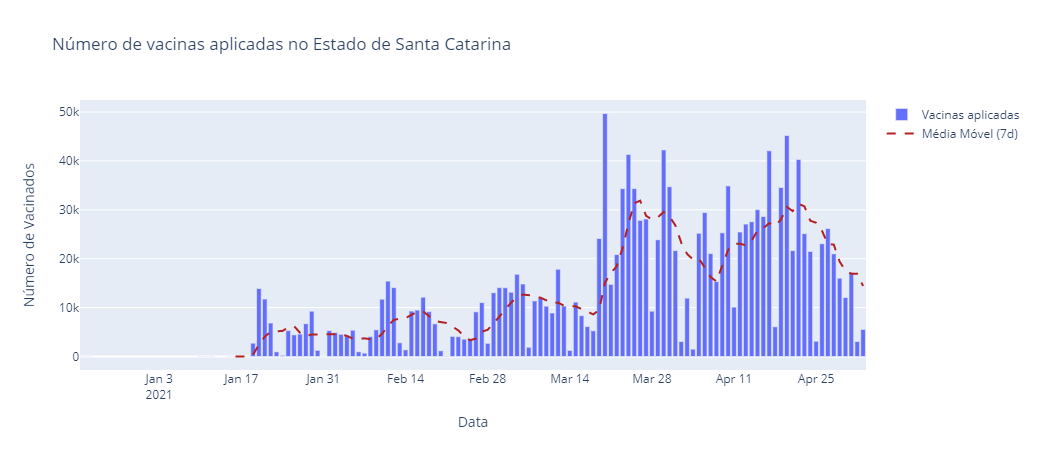

In [69]:
fig.update_traces(hovertemplate='<b>%{x}</b><br>%{y}')

Atualização de layout: o modo do efeito `hover`

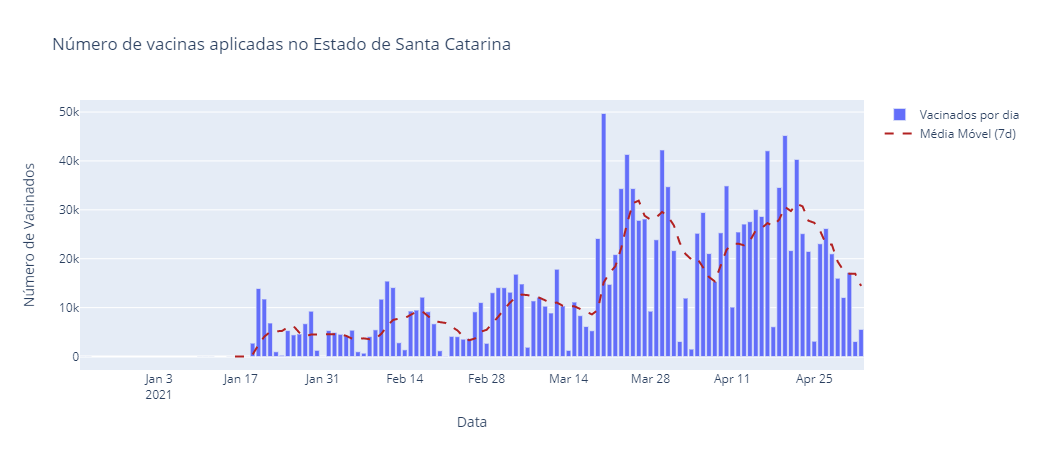

In [56]:
fig.update_layout(hovermode='x')

# Mais sobre Visualização de Dados

No site da biblioteca Plotly encontramos um grande número de gráficos e exemplos: https://plotly.com/python/, que incluem:
- Statistical Charts
- Artificial Intelligence and Machine Learning
- Scientific Charts
- Financial Charts
- Maps
- 3D Charts

## Dashboards

- Plotly possui integração com Dash, um framework em Python para construir aplicações web de analytics.
- Dash trabalha Flask (desenvolvimeno Web com Python), Pltoly e React.js
- Uma galeria com exemplos desenvolvidos: https://dash-gallery.plotly.host/Portal/
- Desenvolvimento na nossa instituição: http://covid19.lages.ifsc.edu.br/